### 회귀 트리

지금까지 알아 본 선형 회귀는 회귀 계수의 관계를 모두 선형으로 가정하는 방식이다

비선형 회귀 역시 비선형 회귀 함수를 통해 결과값을 예측한다

머신러닝 기반의 회귀는 회귀 계수를 기반으로 하는 최적 회귀 함수를 도출하는 것이 주 목표다

이번에는 트리를 기반으로 하는 회귀 방식을 알아보자

#### 트리 기반의 회귀

- 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측을 한다

- 분류 트리와 크게 다르지 않지만, 리프 노드에서 예측 결정값을 만드는 과정에서 차이가 있다

   → 분류 트리가 특정 레이블을 결정하는 것과 달리 회귀 트리는 리프 노드가 속한 데이터값의 평균값을 구해 회귀 예측값을 계산한다

- 결정 트리, 랜덤 포레스트, GBM, LightGBM, XGBoost 등과 같은 트리 기반 알고리즘은 분류뿐만 아니라 회귀도 지원한다 >> CART

사이킷런 랜덤포레스트 회귀 트리 RandomForestRegressor로 보스턴 주택 가격 예측하기

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

boston_df = pd.read_csv('/content/train.csv')
boston_df

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,TRAIN_000,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9
1,TRAIN_001,1.42502,0.0,19.58,0.0,0.871,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39,23.3
2,TRAIN_002,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9
3,TRAIN_003,9.51363,0.0,18.10,0.0,0.713,6.728,94.1,2.4961,24.0,666.0,20.2,6.68,18.71,14.9
4,TRAIN_004,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10,21.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,TRAIN_450,0.33983,22.0,5.86,0.0,0.431,6.108,34.9,8.0555,7.0,330.0,19.1,390.18,9.16,24.3
451,TRAIN_451,3.83684,0.0,18.10,0.0,0.770,6.251,91.1,2.2955,24.0,666.0,20.2,350.65,14.19,19.9
452,TRAIN_452,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68,8.1
453,TRAIN_453,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93,20.5


In [3]:
y_target = boston_df['MEDV']
X_data = boston_df.drop(['MEDV', 'ID'], axis=1, inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 교차 검증의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 교차 검증의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 교차 검증의 개별 Negative MSE scores: [ -7.39  -9.32 -14.   -15.99  -9.63]
5 교차 검증의 개별 RMSE scores: [2.72 3.05 3.74 4.   3.1 ]
5 교차 검증의 평균 RMSE: 3.323


다른 트리 기반 알고리즘으로도 수행해보기

In [7]:
def get_model_cv_prediction(model, X_data, y_target):
  neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
  rmse_scores = np.sqrt(-1*neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)
  print('####', model.__class__.__name__, '####')
  print('5 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
  get_model_cv_prediction(model, X_data, y_target)

#### DecisionTreeRegressor ####
5 교차 검증의 평균 RMSE: 4.233
#### RandomForestRegressor ####
5 교차 검증의 평균 RMSE: 3.323
#### GradientBoostingRegressor ####
5 교차 검증의 평균 RMSE: 3.264
#### XGBRegressor ####
5 교차 검증의 평균 RMSE: 3.474
#### LGBMRegressor ####
5 교차 검증의 평균 RMSE: 3.649


회귀 트리 Regressor 클래스는 선형 회귀와 다른 처리 방식이므로 회귀 계수를 제공하는 coef_ 속성이 없다

대신 feature_Importances_로 피처별 중요도를 시각화할 수 있다

<Axes: >

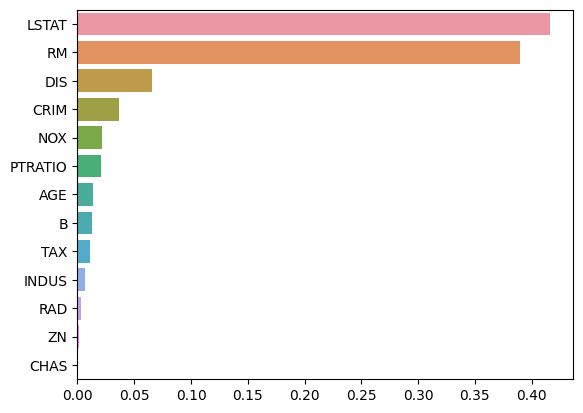

In [10]:
import seaborn as sns

rf_reg = RandomForestRegressor(n_estimators=1000)

rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

이번에는 회귀 트리 Regressor가 어떻게 예측값을 판단하는지 선형 회귀와 비교하여 알아보자

  - 2차원 평면으로 회귀 예측선을 쉽게 표현하기 위해 타겟값과 가장 밀접한 상관관계를 가지는 LSTAT 칼럼만 이용하기

  - 데이터셋 개수를 100개만 샘플링하고 산점도 형태로 살펴보자


(100, 2)


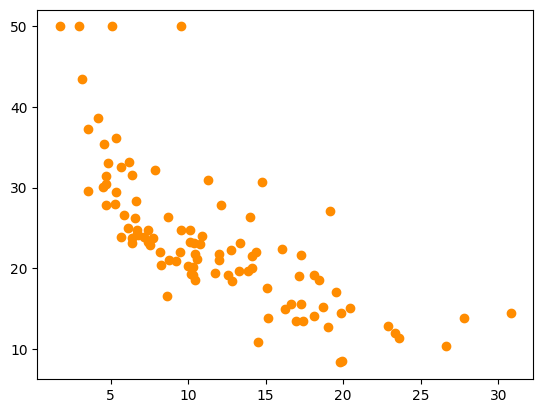

In [13]:
import matplotlib.pyplot as plt

boston_df_sample = boston_df[['LSTAT', 'MEDV']]
boston_df_sample = boston_df_sample.sample(n=100, random_state=0)
print(boston_df_sample.shape)
plt.figure()
plt.scatter(boston_df_sample.LSTAT, boston_df_sample.MEDV, c='darkorange')

- 결정 트리의 하이퍼 파라미터 max_depth의 크기를 변화시키면서 예측선 변화를 살펴보기

In [14]:
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

#실제 예측을 적용할 테스트용 데이터셋
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1,1)

X_feature = boston_df_sample['LSTAT'].values.reshape(-1,1)
y_target = boston_df_sample['MEDV'].values.reshape(-1,1)

lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

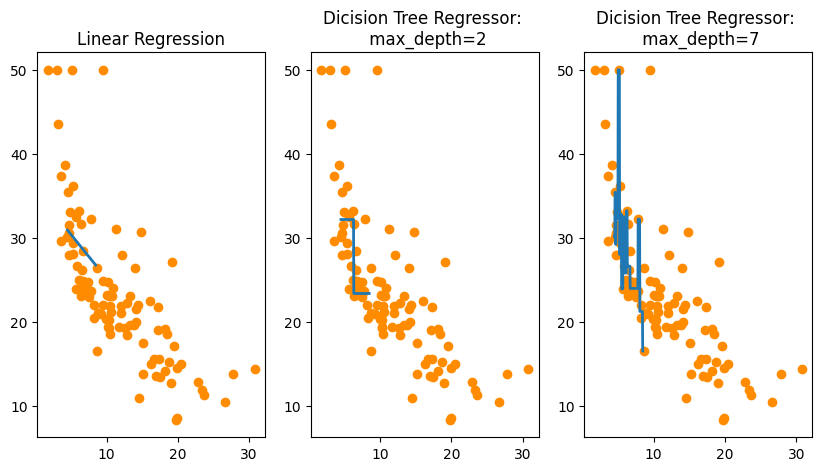

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(10,5), ncols=3)

ax1.set_title('Linear Regression')
ax1.scatter(boston_df_sample.LSTAT, boston_df_sample.MEDV, c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

ax2.set_title('Dicision Tree Regressor: \n max_depth=2')
ax2.scatter(boston_df_sample.LSTAT, boston_df_sample.MEDV, c='darkorange')
ax2.plot(X_test, pred_rf2, label='max_depth:2', linewidth=2)

ax3.set_title('Dicision Tree Regressor: \n max_depth=7')
ax3.scatter(boston_df_sample.LSTAT, boston_df_sample.MEDV, c='darkorange')
ax3.plot(X_test, pred_rf7, label='max_depth:7', linewidth=2)

회귀 트리는 분할 되는 데이터 지점에 따라 브랜치를 만들면서 계단 형태로 회귀선을 만든다

max_depth=7인 경우에는 학습데이터셋의 이상치 데이터로 학습하게되면서 복잡한 계단 형태의 회귀선을 만들어 과적합이 되기 쉬운 모델이 되었다